In [ ]:
# code is from kaggle, data is from Udemy 
# https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained
# https://www.youtube.com/watch?v=n7npKX5zIWI&t=548s

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [59]:
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [60]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

### Splitting the dataset into the Training and Test sets

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

### Feature Scaling

* Standardization is all about scaling your data in such a way that all the variables and their values lie within a similar range


*  if there is a significant difference in the scale between the features of the dataset; for example, 
   one feature ranges in values between 0 and 1 and another between 100 and 1,000. PCA is very sensitive 
   to the relative ranges of the original features. We can apply z-score standardization to get all features 
   into the same scale by using Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn.

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape

#when u are applying your standard scaler object to your training set u have to fit the object of the training set and then
#transform it, and when coming to test set we only transform and don't fit the object b'cause it's already fitted to the 
#training set.

((142, 13), (36, 13))

### Eigendecomposition - Computing Eigenvectors and Eigenvalues
* The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors    (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In      other words, the eigenvalues explain the variance of the data along the new feature axes.

### Covariance Matrix 
* The classic approach to PCA is to perform the eigendecomposition on the covariance matrix , which is a matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

Cov(X,Y)=∑(xi−x¯)(yi−y¯)/N−1

In [63]:
X_mean = np.mean(X_train, axis=0)
cov_mat = (X_train - X_mean).T.dot((X_train - X_mean)) / (X_train.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0070922   0.10158986  0.26809509 -0.27516974  0.23703425  0.31671433
   0.27851441 -0.10086553  0.1305509   0.57003979 -0.06801958  0.05747774
   0.62420905]
 [ 0.10158986  1.0070922   0.17469631  0.26867072 -0.03184697 -0.32482824
  -0.42013761  0.33304303 -0.22082499  0.30464878 -0.54532022 -0.39388534
  -0.18750673]
 [ 0.26809509  0.17469631  1.0070922   0.44913101  0.20279733  0.16173403
   0.09405082  0.15934325  0.01757216  0.26297426 -0.09527385 -0.01162687
   0.19229708]
 [-0.27516974  0.26867072  0.44913101  1.0070922  -0.10161795 -0.32802847
  -0.4026876   0.38895703 -0.21705802  0.01275967 -0.25428449 -0.30031831
  -0.43572181]
 [ 0.23703425 -0.03184697  0.20279733 -0.10161795  1.0070922   0.18356106
   0.16698341 -0.31275131  0.26207895  0.15237759  0.04270468  0.03007895
   0.34142812]
 [ 0.31671433 -0.32482824  0.16173403 -0.32802847  0.18356106  1.0070922
   0.86413313 -0.4576375   0.62739301 -0.06254654  0.45572406  0.71439803
   0.53185581]
 [ 0

In [64]:
cov_mat = np.cov(X_train.T)    # another simple approach for Covariance matrix without typing covariance formula
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0070922   0.10158986  0.26809509 -0.27516974  0.23703425  0.31671433
   0.27851441 -0.10086553  0.1305509   0.57003979 -0.06801958  0.05747774
   0.62420905]
 [ 0.10158986  1.0070922   0.17469631  0.26867072 -0.03184697 -0.32482824
  -0.42013761  0.33304303 -0.22082499  0.30464878 -0.54532022 -0.39388534
  -0.18750673]
 [ 0.26809509  0.17469631  1.0070922   0.44913101  0.20279733  0.16173403
   0.09405082  0.15934325  0.01757216  0.26297426 -0.09527385 -0.01162687
   0.19229708]
 [-0.27516974  0.26867072  0.44913101  1.0070922  -0.10161795 -0.32802847
  -0.4026876   0.38895703 -0.21705802  0.01275967 -0.25428449 -0.30031831
  -0.43572181]
 [ 0.23703425 -0.03184697  0.20279733 -0.10161795  1.0070922   0.18356106
   0.16698341 -0.31275131  0.26207895  0.15237759  0.04270468  0.03007895
   0.34142812]
 [ 0.31671433 -0.32482824  0.16173403 -0.32802847  0.18356106  1.0070922
   0.86413313 -0.4576375   0.62739301 -0.06254654  0.45572406  0.71439803
   0.53185581]
 [ 0

In [65]:
# Next, we perform an eigen decomposition on the covariance matrix:

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.12959991  0.49807323 -0.1383815   0.24199813  0.17279973  0.17873289
  -0.09000534 -0.08850175 -0.26402263  0.48169166 -0.43303897 -0.2793571
   0.11125519]
 [-0.24464064  0.23168482  0.08422378  0.03501265 -0.58431883  0.50041745
  -0.44755409  0.02912494  0.05505047  0.08986837  0.18860336  0.13627368
  -0.14108829]
 [-0.01018912  0.31496874  0.63988217  0.00978418  0.26362755  0.16064973
   0.06751248 -0.1213575   0.01688933 -0.37909702  0.0325249  -0.32898212
  -0.35109208]
 [-0.24051579 -0.02321825  0.62195017 -0.0922443   0.02622374 -0.0559492
   0.24334226  0.08600336 -0.05553175  0.51955024  0.13288449  0.22277751
   0.36816801]
 [ 0.12649451  0.25841951  0.02997765 -0.82788074  0.08753303 -0.07810127
  -0.30855505  0.09468425  0.06758476 -0.07256418 -0.26176222  0.13059365
   0.13263758]
 [ 0.38944115  0.1006849   0.17115651  0.16969861 -0.16632648 -0.0217019
   0.08597346 -0.36183225 -0.3119664  -0.21081573 -0.21572363  0.65199927
  -0.01582547]
 [ 0.427578

In [66]:
# Make a list of (eigenvalue, eigenvector) tuples

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(4.8289408339225215,
  array([ 0.12959991, -0.24464064, -0.01018912, -0.24051579,  0.12649451,
          0.38944115,  0.42757808, -0.30505669,  0.30775255, -0.11027186,
          0.30710508,  0.37636185,  0.2811085 ])),
 (2.529202544186417,
  array([ 0.49807323,  0.23168482,  0.31496874, -0.02321825,  0.25841951,
          0.1006849 ,  0.02097952,  0.0399057 ,  0.06746036,  0.53087111,
         -0.27161729, -0.16071181,  0.36547344])),
 (1.4077860734697651,
  array([-0.1383815 ,  0.08422378,  0.63988217,  0.62195017,  0.02997765,
          0.17115651,  0.12464239,  0.17100464,  0.15155321, -0.14612801,
          0.10692701,  0.17144241, -0.13178214])),
 (0.9717024794763274,
  array([ 0.24199813,  0.03501265,  0.00978418, -0.0922443 , -0.82788074,
          0.16969861,  0.12346501,  0.39521252, -0.06413801,  0.10827243,
          0.05295673,  0.14487111,  0.07973043])),
 (0.817726141338358,
  array([ 0.17279973, -0.58431883,  0.26362755,  0.02622374,  0.08753303,
         -0.16632648, 

In [67]:
# Sort the (eigenvalue, eigenvector) tuples from high to low

eig_pairs.sort(key = lambda x:x[0], reverse = True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.8289408339225215
2.529202544186417
1.4077860734697651
0.9717024794763274
0.817726141338358
0.6426960928882302
0.539043433256971
0.32677915004292307
0.30227987874900986
0.24405475271792992
0.2267263071015333
0.16401706132420635
0.09124383308608718


### Explained Variance:
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [68]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 36.88410929,  56.20250359,  66.9553658 ,  74.37736199,
        80.62326588,  85.53226638,  89.6495537 ,  92.14553746,
        94.45439244,  96.31851596,  98.05028244,  99.30306715,
       100.        ])

In [69]:
# In the above array we see that the first feature explains roughly 36.88% of the variance within our data set 
# while the second explain 56.20 and so on.

Text(0,0.5,'Cummulative explained variance')

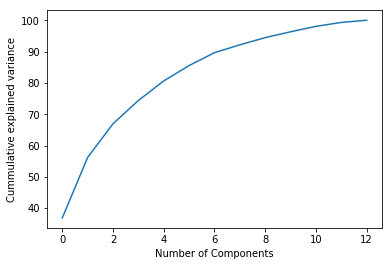

In [70]:
plt.plot(cum_var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Cummulative explained variance')

In [71]:
# The above plot shows almost 90% variance by the first 12 components.

### Applying PCA

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state =42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape, X_test.shape

# here n_components is the final number of extracted features in your new data set 

# How many n_components or extracted features u need to choose ? (to reduce the dimentionality of the dataset)

# Lets start with 2 pricipal components(i.e, 2 exracted features) and see the result u get 
# If we get good results with 2 well we'll be able to visualize the training set and test set result in 2 dimensions.
# If we get poor results and we see on the graph that we cant separate the three classes(i.e,our dependent variable has 
# 3 classes (1,2,3) ) properly then we go for higher number of principal components like 3,4,... and at some point we'll get
# *** some extracted features that explian well enough "variance" which is exactly what PCA about.

((142, 12), (36, 12))

### Training the Logistic Regression model on the Training set

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [76]:
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [77]:
df = pd.DataFrame(data = [y_pred,y_test])
df.T.head()

,0,1
0,1,1
1,3,3
2,2,2
3,1,1
4,2,2


### Checking Accuracy with Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

In [ ]:
# So we got 100% accuracy witn n_components = 12